In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# general imports
import pandas as pd
import numpy as np
from numpy import std
import matplotlib.pyplot as plt
from numpy import mean
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import preprocessing, neighbors
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier,  RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 


import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [20]:
# importing data from data source
house = pd.read_csv('/content/drive/MyDrive/Mini_Project/DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
house.head()     # showing first 5 rows of data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


## Data Exploration

In [21]:
 # Checking the structure of data
house.shape

(3000, 14)

In [22]:
# types of column
house.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [23]:
# Summerization of data
house.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


## Data Preprocessing

In [24]:
# Copy
df1 = house.copy()

In [25]:
# Replacing special charater to nan value if exists
special_char = ["!","@","#","$","^","&","*",",","-"," ?"]
df1.replace(special_char, value=np.nan, inplace=True)

In [26]:
# Checking Nan Values
df1.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

No nan value found so we can skip missing value treatment.

In [27]:
# converting categorical columns to numerical
df1.replace({'Grade':{'A':0,'B':1,'C':2,'D':3,'E':4}, 'roof':{'YES':0, 'NO':1}}, inplace=True)

In [28]:
df1.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,1,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,0,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,0,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,0,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,1,0,75,3,40,1,3843,3


In [29]:
# scaling the dataset
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  new_data = df1.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  data_scaled = pd.DataFrame(scaler.fit_transform(new_data.to_numpy()),columns=new_data.columns)
  return data_scaled

In [30]:
# scaling the data using MinMax Scaling process
scale = 'minmax' #standard
data_scaled = feature_scale(scale)
data_scaled.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,1.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.75
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,0.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944,0.75
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,0.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702,0.50
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,0.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301,0.75
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,1.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.75


In [31]:
# correlation
corr = data_scaled.corr()
corr.style.background_gradient(cmap='Wistia')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,-0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,-0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,-0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,-0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,-0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,-0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,-0.011059,-0.014229,-0.025142,-0.023058,-0.028549,-0.028212,1.000000,-0.976561,0.004640,-0.014985,0.007983,0.020511,-0.007880,0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,-0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,-0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


In [32]:
#SELECTING BEST FEATURE BASED ON THERE CORRELATION VALUE GREATER THAN 0.1
best_feature = []
for i in df1:
  if abs(df1[i].corr(data_scaled['Grade']))>=0.5:
    best_feature.append(i) 
best_feature

['Trooms',
 'Nbedrooms',
 'Nbwashrooms',
 'Twashrooms',
 'Nfloors',
 'Expected price',
 'Grade']

## Data Visualization

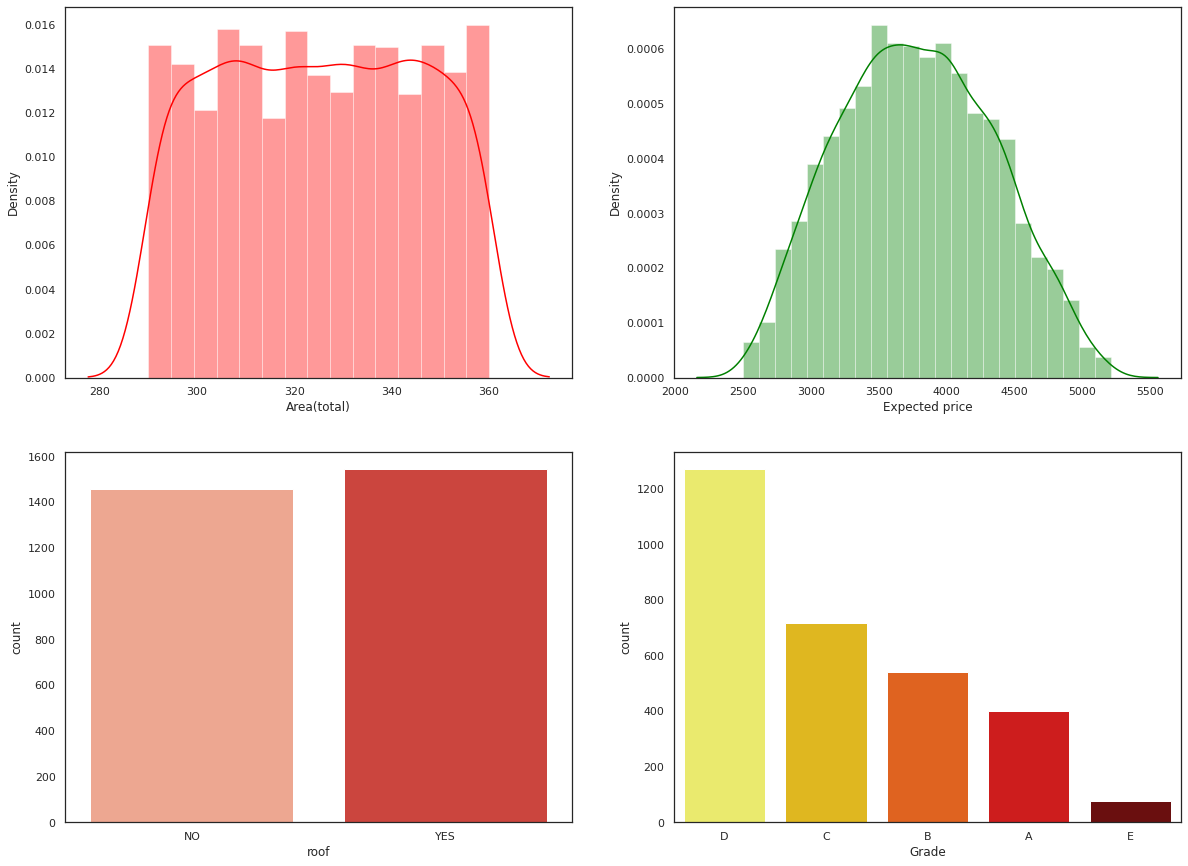

In [33]:
plt.figure(figsize=(20,15))
# dist of total area
plt.subplot(2,2,1)
sns.distplot(df1['Area(total)'], color='red')
# dist of Expected price
plt.subplot(2,2,2)
sns.distplot(df1['Expected price'], color='green')
# count of roof houses
plt.subplot(2,2,3)
sns.countplot(house['roof'], palette='Reds')
# count of roof houses
plt.subplot(2,2,4)
sns.countplot(house['Grade'], palette='hot_r')



1.   Most of a houses having area between 320-360 mm2
2.   Expected prices are normally distributed
3.   Most of houses having roof.
4.   Most of house are in D grade.



## Splitting the data 

In [88]:
df_scaled = data_scaled[['Trooms', 'Nbedrooms', 'Twashrooms', 'Nfloors', 'Expected price']]
df_grade = df1[['Grade']]
df = pd.concat([df_scaled, df_grade], axis=1)
df.head()

,Trooms,Nbedrooms,Twashrooms,Nfloors,Expected price,Grade
0,0.25,0.500000,0.500,0.166667,0.360251,3
1,0.00,0.333333,0.250,0.333333,0.370944,3
2,0.50,0.500000,0.375,0.666667,0.458702,2
3,0.25,0.333333,0.375,0.166667,0.232301,3
4,0.50,0.333333,0.375,0.333333,0.493732,3


In [70]:
# Creating test and training datasets
df_train, df_test = train_test_split(df,train_size = 0.8)

# specifying x and y
X_train = df_train.drop(columns='Grade', axis =1)
Y_train = df_train['Grade']
X_test = df_test.drop(columns='Grade', axis =1)
Y_test = df_test['Grade']

In [89]:
# creating function to build model and to evaluate it
def MODEL(model, X_train, Y_train, X_test, Y_test):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    acc = cross_val_score(model, X_train, Y_train, cv=cv, n_jobs=-1, error_score='raise')
    pre = cross_val_score(model, X_train, Y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
    rec = cross_val_score(model, X_train, Y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
    f1 = cross_val_score(model, X_train, Y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

    clf = model.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    
    print('Accuaracy-Score: {} %'.format(round(mean(acc)*100,2)))
    print('Precision-Score: {} %'.format(round(mean(pre)*100,2)))
    print('Recall-Score: {} %'.format(round(mean(rec)*100,2)))
    print('F1-Score: {} %'.format(round(mean(f1)*100,2)))
    print('Confusion Matrix :\n',confusion_matrix(Y_test,Y_pred))
    cm= confusion_matrix(Y_test,Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(cm)
    cm_display.plot()
    plt.show()

## Applying logistic Regressor

In [ ]:
MODEL(LogisticRegression(), X_train, Y_train, X_test, Y_test)

Logistic regression model is giving 80% accuracy

## Applying Decission tree classifier

Accuaracy-Score: 69.14 %
Precision-Score: 69.5 %
Recall-Score: 69.42 %
F1-Score: 69.24 %
Confusion Matrix :
 [[ 73  14   1   0   0]
 [ 15  78  18   0   0]
 [  1  18  92  23   0]
 [  0   0  33 201  20]
 [  0   0   0  11   2]]


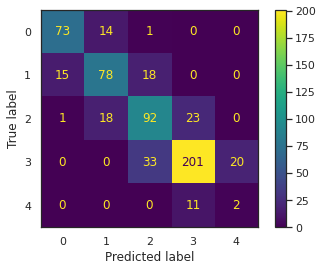

In [74]:
MODEL(DecisionTreeClassifier(), X_train, Y_train, X_test, Y_test)

Decission tree classifier giving 70% accuracy.

## Applying Random Forest Classifier

Accuaracy-Score: 72.54 %
Precision-Score: 72.09 %
Recall-Score: 72.64 %
F1-Score: 72.09 %
Confusion Matrix :
 [[ 72  16   0   0   0]
 [ 13  84  13   1   0]
 [  1  14  93  26   0]
 [  0   0  29 213  12]
 [  0   0   0  11   2]]


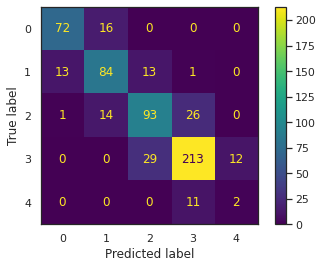

In [77]:
MODEL(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)

Random Forest classifier is giving 73% accuracy.

## Applying Adaptive Boosting Classifier

Accuaracy-Score: 65.54 %
Precision-Score: 66.17 %
Recall-Score: 65.54 %
F1-Score: 63.8 %
Confusion Matrix :
 [[ 81   7   0   0   0]
 [ 19  64  28   0   0]
 [  0   4 107  23   0]
 [  0   0  45 209   0]
 [  0   0   0  13   0]]


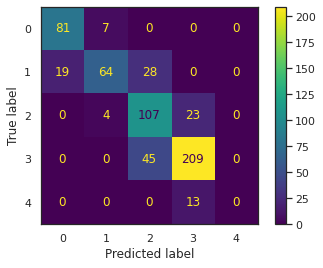

In [80]:
MODEL(AdaBoostClassifier(), X_train, Y_train, X_test, Y_test)

Adaptive Boosting Classifier is giving 66% Accuracy.

## Stacking Classifier

Accuaracy-Score: 70.58 %
Precision-Score: 70.59 %
Recall-Score: 69.96 %
F1-Score: 70.07 %
Confusion Matrix :
 [[ 72  16   0   0   0]
 [ 18  75  18   0   0]
 [  0  22  77  35   0]
 [  0   1  33 204  16]
 [  0   0   0  12   1]]


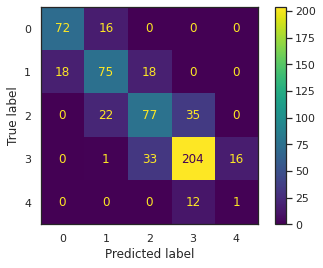

In [81]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = DecisionTreeClassifier()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

MODEL(get_stacking(), X_train, Y_train, X_test, Y_test)

Stacking classifier is giving 71% accuracy.

Minimum error:- 0.125 at K = 7


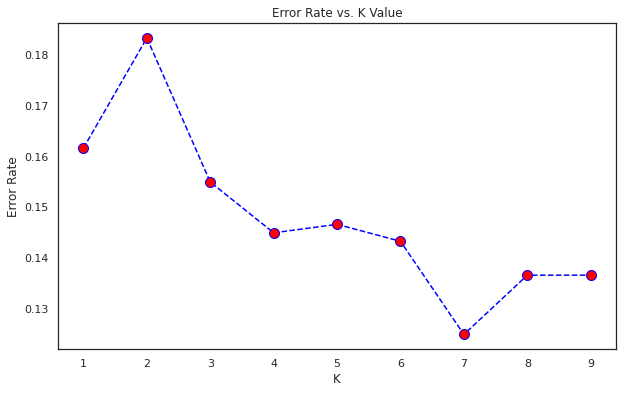

In [ ]:
# Finding a good K to train the model.

from sklearn import neighbors
error_rate = []
for i in range(1,10):
  clf_food = neighbors.KNeighborsClassifier(n_neighbors=i)
  clf_food.fit(X_train,Y_train)
  pred_i = clf_food.predict(X_test)
  error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

optimum k value is 7 because it's giving satisfying accuracy and minimum error of 0.13.

## Building a KNN Classification model by fitting the training dataset

Accuaracy-Score: 77.76 %
Precision-Score: 76.18 %
Recall-Score: 77.76 %
F1-Score: 76.75 %
Confusion Matrix :
 [[ 75  13   0   0   0]
 [ 11  81  19   0   0]
 [  0  10  93  31   0]
 [  0   0  20 234   0]
 [  0   0   0  13   0]]


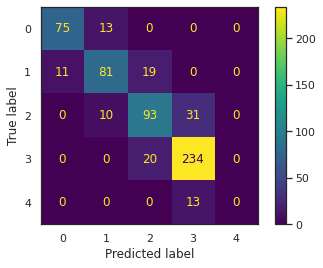

In [85]:
k=7
MODEL(neighbors.KNeighborsClassifier(k), X_train, Y_train, X_test, Y_test)

KNN Classifier is a good model giving 78% accuracy.

## From the above all model we found that logistic regression model is giving 80% accuracy.



*   Accuaracy-Score: 79.44 %
*   Precision-Score: 77.25 %
*   Recall-Score: 79.44 %
*   F1-Score: 78.14 %

## So we can say logistic regression is the best model among all.



## Training the model using logistic regression

In [90]:
# training model
model = LogisticRegression()
clf = model.fit(X_train,Y_train)

In [91]:
# predicting values
y_pred = clf.predict(X_test)
print('Predicted values of grade of houses are as follows:')
y_pred

Predicted values of grade of houses are as follows:


array([3, 0, 3, 3, 0, 3, 1, 2, 3, 3, 2, 3, 1, 3, 3, 1, 3, 3, 0, 3, 3, 0,
       1, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 0, 3, 3, 1, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 0, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 0, 1, 0, 2,
       3, 2, 3, 0, 2, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 3, 1, 1, 3, 1, 3, 3,
       3, 3, 2, 3, 3, 1, 3, 3, 1, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 0, 2, 0,
       2, 0, 1, 2, 3, 2, 0, 3, 1, 2, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 2, 1, 2, 2, 3, 0, 1, 3, 0, 0, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2,
       1, 3, 3, 1, 0, 2, 1, 0, 0, 3, 2, 3, 3, 3, 0, 3, 1, 1, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 0, 3, 2, 3, 0, 2, 3, 2, 1, 2, 1, 1, 0, 3, 1,
       3, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1, 1, 3, 2, 2, 3, 1, 2, 3, 2, 1, 3,
       3, 3, 3, 3, 1, 0, 3, 2, 2, 2, 3, 0, 2, 0, 2, 3, 3, 0, 1, 1, 3, 3,
       3, 2, 2, 1, 3, 1, 0, 3, 0, 3, 2, 3, 3, 1, 3, 0, 3, 2, 2, 3, 0, 2,
       3, 3, 1, 0, 2, 2, 1, 3, 2, 2, 3, 2, 3, 2, 0, 3, 0, 1, 3, 3, 2, 3,
       1, 2, 2, 3, 2, 3, 3, 1, 3, 3, 3, 0, 1, 2, 3,

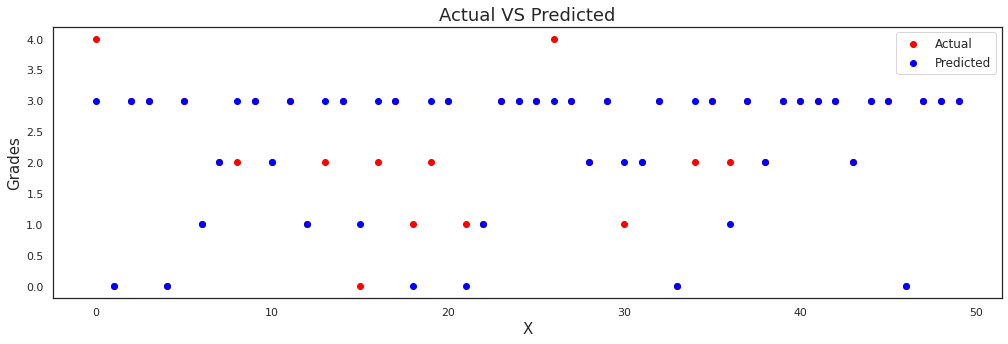

In [94]:
# plotting actual and pred values of first 50 datapoints 
x_1 = list(np.arange(0,len(Y_test.iloc[:50])))
plt.figure(figsize=(17,5))
plt.scatter(x_1,Y_test.iloc[:50],color='red')
plt.scatter(x_1,pd.Series(y_pred).iloc[:50],color='blue')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Grades' , fontsize = 15)
plt.legend(['Actual','Predicted'],loc="upper right",fontsize = 12)
plt.title('Actual VS Predicted' , fontsize = 18);